# Analise de notas dos alunos da UFRN

### Introdução

Nesse notebook vamos fazer correlações a respeito das notas obtidas em disciplinas do IMD do semestre 2015.1 até 2017.2 e assim mostrar desempenho dos alunos nessas materias e com isso tentarremos descobrir o que pode estar levando os alunos a tirarem as notas que encontrarmos.

### Recursos utilizados

Para chegarmos aos resultados esperados vamos utilizar os arquivos ".csv" dispolibilizados pela UFRN no portal de dados abertos. Apois isso vamos utilizar bibliotecas famosas da area de BigData como pandas e numpy para manipular os dados. No final vamos utilizar o a biblioteca Bokeh para expor os resultados finais.

In [1]:
!pip install pandas
!pip install numpy
!pip install bokeh
!pip install networkx
!pip install matplotlib

notebook 5.4.0 requires terminado>=0.8.1, which is not installed.


notebook 5.4.0 requires terminado>=0.8.1, which is not installed.


notebook 5.4.0 requires terminado>=0.8.1, which is not installed.


notebook 5.4.0 requires terminado>=0.8.1, which is not installed.


notebook 5.4.0 requires terminado>=0.8.1, which is not installed.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from urllib.request import urlopen
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# componentes_curriculares
def download_csv(url, filename):
    filedata = urlopen(url)  
    datatowrite = filedata.read()

    with open(filename, 'wb') as f:  
        f.write(datatowrite)

In [2]:
# try to read csv, if not possible just download it
# if don't download the csv just jump all the steps below to the analysis
try:
    matriculas = pd.read_csv('matriculas_finais.csv', sep=';', encoding='latin1')
except:
    print('> Não foi possivel ler o csv com os dados nescessários.')
    print('> Iniciando o download de dados para recriar o csv nescessário para a análise.')
    url_gastos_unidades = 'http://dados.ufrn.br/dataset/fb903241-9788-4d85-a9f6-bcf284bef71e/resource/f435bacb-819c-4699-af1c-2f0b13949d64/download/gastos-por-unidade.csv'

    url_cursos_ufrn = 'http://dados.ufrn.br/dataset/08b0dc59-faa9-4281-bd1e-2a39f532489e/resource/949be3d1-e85b-4d0f-9f60-1d9a7484bb06/download/cursos-ufrn'

    url_matriculas_2015_1 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/9e7ba1c2-f92d-4b9c-9e91-3b026ecdf913/download/matriculas-de-2015.1.csv'
    url_matriculas_2015_2 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/baa6c8b4-2072-417f-b238-c028ccc8c14b/download/matriculas-de-2015.2.csv'
    url_matriculas_2016_1 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv'
    url_matriculas_2016_2 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv'
    url_matriculas_2017_1 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171'
    url_matriculas_2017_2 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172'

    url_turmas_2015_1 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/4d5aee5a-00b0-4ed6-a4be-59fa77a56797/download/turmas-2015.1.csv'
    url_turmas_2015_2 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/7c59621c-4a8b-49d4-b319-83cfea9bdf28/download/turmas-2015.2.csv'
    url_turmas_2016_1 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/322d9977-ba15-47f1-8216-75a1ca78e197/download/turmas-2016.1.csv'
    url_turmas_2016_2 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e8e3228-7f22-40a2-9efd-561c44844567/download/turmas-2016.2.csv'
    url_turmas_2017_1 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e77d066-d506-45eb-a21e-76aa79616fef/download/turmas-2017.1.csv'
    url_turmas_2017_2 = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/01fe7343-fdf0-4a67-b915-2386b7c2fecb/download/turmas-2017.2.csv'

    docentes_url = 'http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv'

    download_csv(url_cursos_ufrn, 'cursos_ufrn.csv')

    download_csv(url_matriculas_2015_1, 'matriculas_2015-1.csv')
    download_csv(url_matriculas_2015_2, 'matriculas_2015-2.csv')
    download_csv(url_matriculas_2016_1, 'matriculas_2016-1.csv')
    download_csv(url_matriculas_2016_2, 'matriculas_2016-2.csv')
    download_csv(url_matriculas_2017_1, 'matriculas_2017-1.csv')
    download_csv(url_matriculas_2017_2, 'matriculas_2017-2.csv')

    download_csv(url_turmas_2015_1, 'turmas_2015-1.csv')
    download_csv(url_turmas_2015_2, 'turmas_2015-2.csv')
    download_csv(url_turmas_2016_1, 'turmas_2016-1.csv')
    download_csv(url_turmas_2016_2, 'turmas_2016-2.csv')
    download_csv(url_turmas_2017_1, 'turmas_2017-1.csv')
    download_csv(url_turmas_2017_2, 'turmas_2017-2.csv')

In [3]:
try:
    print(matriculas.head())
except:
    print('Download de todos os csvs terminado.')

   Unnamed: 0                          discente   codigo codigo.1  \
0           0  bcd9e4d861acc00fac216bbe953c63b8  IMD0040  IMD0040   
1           1  bcd9e4d861acc00fac216bbe953c63b8  IMD0040  IMD0040   
2           2  bcd9e4d861acc00fac216bbe953c63b8  IMD0040  IMD0040   
3           3  1fdfae54f2e3d6e8a00d8ceab48c74f6  IMD0040  IMD0040   
4           4  1fdfae54f2e3d6e8a00d8ceab48c74f6  IMD0040  IMD0040   

                    nome_y                         nome_x  \
0  CARLOS EDUARDO DA SILVA  LINGUAGEM DE PROGRAMAÃÃO II   
1  CARLOS EDUARDO DA SILVA  LINGUAGEM DE PROGRAMAÃÃO II   
2  CARLOS EDUARDO DA SILVA  LINGUAGEM DE PROGRAMAÃÃO II   
3  CARLOS EDUARDO DA SILVA  LINGUAGEM DE PROGRAMAÃÃO II   
4  CARLOS EDUARDO DA SILVA  LINGUAGEM DE PROGRAMAÃÃO II   

                 descricao_horario  unidade  nota reposicao  media_final  \
0  24N12 (02/02/2015 - 20/06/2015)      2.0   7.6         f          7.9   
1  24N12 (02/02/2015 - 20/06/2015)      1.0   8.4         f       

### Limpando_os_dados_dos_CSVs

Se a leitura do CSV matricula ocorreu sem problemas apenas pule os passos abaixo e va para a secção [Analise das notas](#Analise_das_notas).

In [48]:
docentes = pd.read_csv(docentes_url, sep=';')

In [51]:
cursos_ufrn = pd.read_csv('cursos_ufrn.csv', sep=';', error_bad_lines=False)

componente = pd.read_csv('componentes_curriculares.csv', sep=';'
                         , usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])

matriculas_2015_1 = pd.read_csv('matriculas_2015-1.csv', sep=';')
matriculas_2015_2 = pd.read_csv('matriculas_2015-2.csv', sep=';')
matriculas_2016_1 = pd.read_csv('matriculas_2016-1.csv', sep=';')
matriculas_2016_2 = pd.read_csv('matriculas_2016-2.csv', sep=';')
matriculas_2017_1 = pd.read_csv('matriculas_2017-1.csv', sep=';')
matriculas_2017_2 = pd.read_csv('matriculas_2017-2.csv', sep=';')

In [52]:
# Criação dos csvs das turmas.

turmas_2015_1 = pd.read_csv('turmas_2015-1.csv', sep=';')
turmas_2015_2 = pd.read_csv('turmas_2015-2.csv', sep=';')
turmas_2016_1 = pd.read_csv('turmas_2016-1.csv', sep=';') 
turmas_2016_2 = pd.read_csv('turmas_2016-2.csv', sep=';')
turmas_2017_1 = pd.read_csv('turmas_2017-1.csv', sep=';')
turmas_2017_2 = pd.read_csv('turmas_2017-2.csv', sep=';')

turmas_2015_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2015_2.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2016_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2016_2.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2017_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2017_2.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

turmas_2015_1.id_componente = turmas_2015_1.id_componente.astype(str)
turmas_2015_2.id_componente = turmas_2015_2.id_componente.astype(str)
turmas_2016_1.id_componente = turmas_2016_1.id_componente.astype(str)
turmas_2016_2.id_componente = turmas_2016_2.id_componente.astype(str)
turmas_2017_1.id_componente = turmas_2017_1.id_componente.astype(str)
turmas_2017_2.id_componente = turmas_2017_2.id_componente.astype(str)

turmas_2015_1['ano_semestre'] = '2015_1'
turmas_2015_2['ano_semestre'] = '2015_2'
turmas_2016_1['ano_semestre'] = '2016_1'
turmas_2016_2['ano_semestre'] = '2016_2'
turmas_2017_1['ano_semestre'] = '2017_1'
turmas_2017_2['ano_semestre'] = '2017_2'

In [53]:
# Retirando a coluna Unnamed: 10 de alguns csvs
matriculas_2015_1.drop('Unnamed: 10', 1, inplace=True) 
matriculas_2015_2.drop('Unnamed: 10', 1, inplace=True) 
matriculas_2016_1.drop('Unnamed: 10', 1, inplace=True) 
matriculas_2016_2.drop('Unnamed: 10', 1, inplace=True) 

# Criando coluna ano_semestre

matriculas_2015_1['ano_semestre'] = '2015_1'
matriculas_2015_2['ano_semestre'] = '2015_2'
matriculas_2016_1['ano_semestre'] = '2016_1'
matriculas_2016_2['ano_semestre'] = '2016_2'
matriculas_2017_1['ano_semestre'] = '2017_1'
matriculas_2017_2['ano_semestre'] = '2017_2'

In [54]:
matriculas_2017_1.head()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,ano_semestre
0,57597218,880d7ee5080d3b969bf45556f95ac6b4,2000057.0,1.0,8.7,f,0.0,8.9,0.0,APROVADO,2017_1
1,57597218,880d7ee5080d3b969bf45556f95ac6b4,2000057.0,3.0,10.0,f,0.0,8.9,0.0,APROVADO,2017_1
2,57597218,880d7ee5080d3b969bf45556f95ac6b4,2000057.0,2.0,8.0,f,0.0,8.9,0.0,APROVADO,2017_1
3,57597218,07feb1dc40e26ad43ecb18608f102c49,2000057.0,1.0,8.1,f,0.0,9.0,0.0,APROVADO,2017_1
4,57597218,07feb1dc40e26ad43ecb18608f102c49,2000057.0,3.0,10.0,f,0.0,9.0,0.0,APROVADO,2017_1


In [55]:
# Combinando dataframes das matrículas.
frames = [matriculas_2015_1, matriculas_2015_2, matriculas_2016_1, matriculas_2016_2, matriculas_2017_1, matriculas_2017_2]
matriculas = pd.concat(frames)

In [56]:
frames  = [turmas_2015_1, turmas_2015_2, turmas_2016_1, turmas_2016_2, turmas_2017_1, turmas_2017_2]

turmas = pd.concat(frames)

In [57]:
# Limpando dados inválidos
matriculas = matriculas[matriculas.descricao != 'DESISTENCIA']
matriculas = matriculas[matriculas.descricao != 'CANCELADO']
matriculas = matriculas[matriculas.descricao != 'INDEFERIDO']
matriculas = matriculas[matriculas.descricao != 'EXCLUIDA']
matriculas = matriculas[matriculas.descricao != 'DISPENSADO']
matriculas = matriculas[matriculas.descricao != 'CUMPRIU']
matriculas = matriculas[matriculas.descricao != 'EM ESPERA']
matriculas = matriculas[matriculas.descricao != 'AGUARDANDO DEFERIMENTO']
matriculas = matriculas[matriculas.descricao != 'TRANSFERIDO']
matriculas = matriculas[matriculas.descricao != 'INCORPORADO']

In [58]:
matriculas.to_csv('matriculas.csv', sep=';')

In [59]:
# Retirando valores NaN do dataframe.
componente.dropna(inplace=True)
componente = componente[~componente.id_componente.duplicated()]


In [60]:
# Gerando dataframe com as turmas e componentes
colunas = ["id_turma","id_docente_interno","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario", "ano_semestre"]
merge_turmas_componentes = pd.merge(turmas, componente, on='id_componente')[colunas]

merge_turmas_componentes.dropna(inplace=True)


In [61]:
merge_turmas_componentes

,id_turma,id_docente_interno,codigo,nivel_ensino,nome,unidade_responsavel,situacao_turma,capacidade_aluno,descricao_horario,ano_semestre
0,1217099,18225.0,DOL0009,LATO SENSU,Seminário de Simulação (Estudos de caso),DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,CONSOLIDADA,26.0,23456T234,2015_1
1,1217100,18695.0,DOL0008,LATO SENSU,: Seminário sobre Políticas Públicas para o De...,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,CONSOLIDADA,26.0,345T2345 6T234 (14/04/2015 - 17/04/2015),2015_1
2,57573036,5753068.0,DOL0008,LATO SENSU,: Seminário sobre Políticas Públicas para o De...,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,CONSOLIDADA,2.0,56M12,2015_2
3,1217101,5753068.0,DOL0012,LATO SENSU,Gestão Integrada da Zona Costeira,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,CONSOLIDADA,26.0,23456T123456,2015_1
6,1237217,26152.0,DOD1421,LATO SENSU,CARIOLOGIA,DEPARTAMENTO DE ODONTOLOGIA,CONSOLIDADA,12.0,6T2345,2015_1
7,1237222,5753866.0,DOD1426,LATO SENSU,PRÓTESE UNITARIA SOBRE IMPLANTES,DEPARTAMENTO DE ODONTOLOGIA,CONSOLIDADA,12.0,6N234,2015_1
11,57561818,5752883.0,EAJ0836,TÉCNICO,PISCICULTURA CONTINENTAL,ESCOLA AGRÍCOLA DE JUNDIAÍ,CONSOLIDADA,40.0,5M123,2015_1
12,57581659,5752883.0,EAJ0836,TÉCNICO,PISCICULTURA CONTINENTAL,ESCOLA AGRÍCOLA DE JUNDIAÍ,CONSOLIDADA,40.0,5M123,2016_1
13,57601949,5752883.0,EAJ0836,TÉCNICO,PISCICULTURA CONTINENTAL,ESCOLA AGRÍCOLA DE JUNDIAÍ,EXCLUÍDA,40.0,2M45,2017_1
14,57602019,5752883.0,EAJ0836,TÉCNICO,PISCICULTURA CONTINENTAL,ESCOLA AGRÍCOLA DE JUNDIAÍ,EXCLUÍDA,40.0,5M12,2017_1


In [62]:
# Filtrando para os componentes do IMD

componentes_imd = merge_turmas_componentes[merge_turmas_componentes.codigo.str.contains('IMD')]

componentes_imd = componentes_imd[componentes_imd.situacao_turma == 'CONSOLIDADA']

# Alterando o nome da coluna id_docente_interno para id_servidor (mesma do dataframe docentes).
componentes_imd.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)
componentes_imd.capacidade_aluno = componentes_imd.capacidade_aluno.astype(np.int64)
componentes_imd.id_servidor = componentes_imd.id_servidor.astype(np.int64)

componentes_imd

,id_turma,id_servidor,codigo,nivel_ensino,nome,unidade_responsavel,situacao_turma,capacidade_aluno,descricao_horario,ano_semestre
2136,1239374,5756386,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,67,236M1234 (02/02/2015 - 20/06/2015),2015_1
2137,1239374,5756224,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,67,236M1234 (02/02/2015 - 20/06/2015),2015_1
2138,1239381,5756386,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,66,236M1234 (02/02/2015 - 20/06/2015),2015_1
2139,1239381,5756188,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,66,236M1234 (02/02/2015 - 20/06/2015),2015_1
2140,1239386,5756813,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,65,236N1234 (02/02/2015 - 20/06/2015),2015_1
2141,1239386,5756213,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,65,236N1234 (02/02/2015 - 20/06/2015),2015_1
2142,1239388,25889,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,68,236N1234 (02/02/2015 - 20/06/2015),2015_1
2143,1239388,5756968,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,68,236N1234 (02/02/2015 - 20/06/2015),2015_1
2144,57565214,5756968,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,76,246T1234 (27/07/2015 - 19/12/2015),2015_2
2145,57565214,5756386,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,76,246T1234 (27/07/2015 - 19/12/2015),2015_2


In [63]:
# Merge dos dataframes componentes_imd e docentes, para amarrar os nomes dos docentes as turmas.
colunas = ["id_turma", "codigo", "nivel_ensino", "nome_y", "codigo", "nivel_ensino",
          "nome_x","capacidade_aluno", "descricao_horario", "ano_semestre"]

turmas_imd = pd.merge(componentes_imd, docentes, on="id_servidor")[colunas]
turmas_imd.id_turma = turmas_imd.id_turma.astype(np.int64)
turmas_imd.drop('ano_semestre', axis=1, inplace=True)
turmas_imd.head()


,id_turma,codigo,nivel_ensino,nome_y,codigo,nivel_ensino,nome_x,capacidade_aluno,descricao_horario
0,1239374,IMD0019,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,67,236M1234 (02/02/2015 - 20/06/2015)
1,1239381,IMD0019,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,66,236M1234 (02/02/2015 - 20/06/2015)
2,57565214,IMD0019,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,76,246T1234 (27/07/2015 - 19/12/2015)
3,57576566,IMD0019,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,77,246M1234 (01/02/2016 - 18/06/2016)
4,57576568,IMD0019,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,82,246M3456 (01/02/2016 - 18/06/2016)


In [64]:
matriculas.id_turma = matriculas.id_turma.astype(np.int64)
matriculas.head()


,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,ano_semestre
0,57562481,8833c0e056f90497742882bfcc81b685,100300443.0,2.0,0.0,f,0.0,0.0,0.0,REPROVADO,2015_1
1,57562481,8833c0e056f90497742882bfcc81b685,100300443.0,3.0,0.0,f,0.0,0.0,0.0,REPROVADO,2015_1
2,57562481,7a0a661326418111f7d17aab098757aa,100300443.0,1.0,8.9,f,0.0,8.9,0.0,APROVADO,2015_1
3,57562481,7a0a661326418111f7d17aab098757aa,100300443.0,2.0,8.9,f,0.0,8.9,0.0,APROVADO,2015_1
4,57562481,7a0a661326418111f7d17aab098757aa,100300443.0,3.0,8.9,f,0.0,8.9,0.0,APROVADO,2015_1


In [65]:
colunas = ["discente", "codigo", "nome_y", "nome_x", "descricao_horario", "unidade", "nota", "reposicao"
           , "media_final", "numero_total_faltas", "descricao", "ano_semestre"]

merge_matriculas_turmas_imd = pd.merge(matriculas, turmas_imd, on="id_turma")[colunas]

In [66]:
merge_matriculas_turmas_imd.head()

,discente,codigo,codigo,nome_y,nome_x,descricao_horario,unidade,nota,reposicao,media_final,numero_total_faltas,descricao,ano_semestre
0,bcd9e4d861acc00fac216bbe953c63b8,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),2.0,7.6,f,7.9,2.0,APROVADO,2015_1
1,bcd9e4d861acc00fac216bbe953c63b8,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),1.0,8.4,f,7.9,2.0,APROVADO,2015_1
2,bcd9e4d861acc00fac216bbe953c63b8,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),3.0,7.6,f,7.9,2.0,APROVADO,2015_1
3,1fdfae54f2e3d6e8a00d8ceab48c74f6,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),1.0,7.3,f,6.0,18.0,APROVADO POR NOTA,2015_1
4,1fdfae54f2e3d6e8a00d8ceab48c74f6,IMD0040,IMD0040,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,24N12 (02/02/2015 - 20/06/2015),2.0,5.4,f,6.0,18.0,APROVADO POR NOTA,2015_1


In [67]:
merge_matriculas_turmas_imd.to_csv('matriculas_finais.csv', sep=';')

# ------------------------------------------- Line Break ---------------------------------------------------

In [68]:
matriculas_2017_2.head()#[matriculas_2016_1['id_componente_curricular'] == 55025]

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,ano_semestre
0,57610457,0efbb9328136afcae8d0ecc17296e94e,6633741.0,NaN,NaN,NaN,NaN,NaN,NaN,DESISTENCIA,2017_2
1,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,3.0,0.0,f,0.0,0.0,48.0,CANCELADO,2017_2
2,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,2.0,0.0,f,0.0,0.0,48.0,CANCELADO,2017_2
3,57610457,91fbe8c5c2f52742c2c1dc15d286a3f3,2000030.0,1.0,0.0,f,0.0,0.0,48.0,CANCELADO,2017_2
4,57610457,7c64aa349e5565426721790cfd03a326,2000030.0,1.0,8.5,f,0.0,9.2,3.0,APROVADO,2017_2


In [69]:
ID_TECNOLOGIA_DA_INFORMACAO = 92127264

In [70]:
matriculas_cursos['TECNOLOGIA DA INFORMAÇÃO']['2015.2']

NameError: name 'matriculas_cursos' is not defined

### Analise_das_notas

  Foi dito anteriormente que esse "notebook" vai fazer uma analise de disciplinas do do curso tecnologia da informação do IMD. Abaixo foi feita uma breve analise das notas da disciplina "fundamentos matamáticos da computação 2", uma das matérias mais temidas no curso. A analise consiste em dividir as notas por unidades, isso porque cada semestre possui 3 unidades, outra parte da analise além de separar as notas em unidades também separa em semestres, deixando assim a possibilidade de analisar as notas de cada uniadade de cada semestre, assim tentaremos descobrir se ouve melhora ou piora nas notas da disciplina (isso deve mostrar um reflexo da dificuldade dos alunos em serem aprovados na diciplina).
  
  Os graficos plotados são:
    1. Um "box plot" das 3 unidades de FMC2 contando junto todos os semestres desde que a matéria começou a ser lecionada.
    2. Três "box plot":
        a. um mostrando a primeira unidade de cada semestre de 2015.1 até 2017.2
        b. um mostrando a segunda unidade de cada semestre de 2015.1 até 2017.2
        c. um mostrando a terceira unidade de cada semestre de 2015.1 até 2017.2
    com isso se espera ter uma distribuição de todos os semetres da disciplina de forma que possamos ver o decorrer da materia de um olhar proximo ao dos alunos.

In [4]:
# colocar configuração inicial do seborn para funcionar no notebook
sns.set()
sns.set_context("notebook")

In [6]:
# pegar das matriculas apenas as que foram feitas em FMC2
turmas_fmc2 = matriculas[matriculas['nome_x'] == 'FUNDAMENTOS MATEMÃ\x81TICOS DA COMPUTAÃ\x87Ã\x83O II']

In [8]:
# separar as matriculas por unidades
un1 = turmas_fmc2[turmas_fmc2['unidade'] == 1.0]
un2 = turmas_fmc2[turmas_fmc2['unidade'] == 2.0]
un3 = turmas_fmc2[turmas_fmc2['unidade'] == 3.0]

#### As_3_unidades_de_FMC2_com_todos_os_semestres_juntos

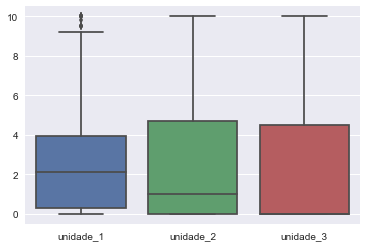

In [9]:
df = pd.DataFrame(index=range(1,len(un1)), columns = ['unidade_1', 'unidade_2', 'unidade_3'])
df['unidade_1'] = un1['nota'].reset_index()['nota']
df['unidade_2'] = un2['nota'].reset_index()['nota']
df['unidade_3'] = un3['nota'].reset_index()['nota']

sns.boxplot(data=df)
plt.show()

#### Primeira_unidade_de_FMC2

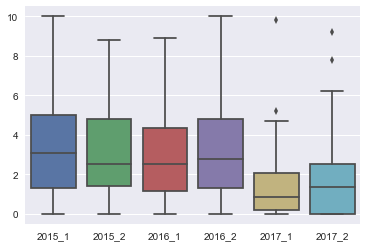

In [20]:
uni_1_2015_1 = un1[un1['ano_semestre'] == '2015_1']['nota'].reset_index()
uni_1_2015_2 = un1[un1['ano_semestre'] == '2015_2']['nota'].reset_index()
uni_1_2016_1 = un1[un1['ano_semestre'] == '2016_1']['nota'].reset_index()
uni_1_2016_2 = un1[un1['ano_semestre'] == '2016_2']['nota'].reset_index()
uni_1_2017_1 = un1[un1['ano_semestre'] == '2017_1']['nota'].reset_index()
uni_1_2017_2 = un1[un1['ano_semestre'] == '2017_2']['nota'].reset_index()

uni_1_2015_2017 = pd.DataFrame(index=range(1,len(uni_1_2015_1)), columns = ['2015_1', '2015_2', '2016_1', '2016_2', '2017_1', '2017_2'])
uni_1_2015_2017['2015_1'] = uni_1_2015_1['nota']
uni_1_2015_2017['2015_2'] = uni_1_2015_2['nota']
uni_1_2015_2017['2016_1'] = uni_1_2016_1['nota']
uni_1_2015_2017['2016_2'] = uni_1_2016_2['nota']
uni_1_2015_2017['2017_1'] = uni_1_2017_1['nota']
uni_1_2015_2017['2017_2'] = uni_1_2017_2['nota']

sns.boxplot(data=uni_1_2015_2017)
plt.show()

#### Segunda unidade de FMC2

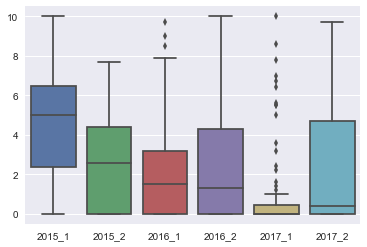

In [19]:
uni_2_2015_1 = un2[un2['ano_semestre'] == '2015_1']['nota'].reset_index()
uni_2_2015_2 = un2[un2['ano_semestre'] == '2015_2']['nota'].reset_index()
uni_2_2016_1 = un2[un2['ano_semestre'] == '2016_1']['nota'].reset_index()
uni_2_2016_2 = un2[un2['ano_semestre'] == '2016_2']['nota'].reset_index()
uni_2_2017_1 = un2[un2['ano_semestre'] == '2017_1']['nota'].reset_index()
uni_2_2017_2 = un2[un2['ano_semestre'] == '2017_2']['nota'].reset_index()

uni_2_2015_2017 = pd.DataFrame(index=range(1,len(uni_1_2015_1)), columns = ['2015_1', '2015_2', '2016_1', '2016_2', '2017_1', '2017_2'])
uni_2_2015_2017['2015_1'] = uni_2_2015_1['nota']
uni_2_2015_2017['2015_2'] = uni_2_2015_2['nota']
uni_2_2015_2017['2016_1'] = uni_2_2016_1['nota']
uni_2_2015_2017['2016_2'] = uni_2_2016_2['nota']
uni_2_2015_2017['2017_1'] = uni_2_2017_1['nota']
uni_2_2015_2017['2017_2'] = uni_2_2017_2['nota']

sns.boxplot(data=uni_2_2015_2017)
plt.show()

#### Terceira_unidade_de_FMC2

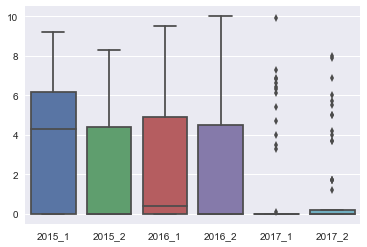

In [18]:
uni_3_2015_1 = un3[un3['ano_semestre'] == '2015_1'][['nota', 'ano_semestre']].reset_index()
uni_3_2015_2 = un3[un3['ano_semestre'] == '2015_2'][['nota', 'ano_semestre']].reset_index()
uni_3_2016_1 = un3[un3['ano_semestre'] == '2016_1'][['nota', 'ano_semestre']].reset_index()
uni_3_2016_2 = un3[un3['ano_semestre'] == '2016_2'][['nota', 'ano_semestre']].reset_index()
uni_3_2017_1 = un3[un3['ano_semestre'] == '2017_1'][['nota', 'ano_semestre']].reset_index()
uni_3_2017_2 = un3[un3['ano_semestre'] == '2017_2'][['nota', 'ano_semestre']].reset_index()

uni_3_2015_2017 = pd.DataFrame(index=range(1,len(uni_1_2015_1)), columns = ['2015_1', '2015_2', '2016_1', '2016_2', '2017_1', '2017_2'])
uni_3_2015_2017['2015_1'] = uni_3_2015_1['nota']
uni_3_2015_2017['2015_2'] = uni_3_2015_2['nota']
uni_3_2015_2017['2016_1'] = uni_3_2016_1['nota']
uni_3_2015_2017['2016_2'] = uni_3_2016_2['nota']
uni_3_2015_2017['2017_1'] = uni_3_2017_1['nota']
uni_3_2015_2017['2017_2'] = uni_3_2017_2['nota']

sns.boxplot(data=uni_3_2015_2017)
plt.show()

## Analise dos gráficos obtidos

Com uma olhada no primeiro grafico [As_3_unidades_de_FMC2_com_todos_os_semestres_juntos](#As_3_unidades_de_FMC2_com_todos_os_semestres_juntos) notamos na unidade 1 50% dos alunos ficam com notas entre 0.5 e 4 com mediana igual a algo proximo de 2. O restante tira nota igual a 0 ou maior que 4 e menor que 9, tendo alguns "outlines" que ficam com nota superior a 9. Vamos para o grafico [Primeira_unidade_de_FMC2](#Primeira_unidade_de_FMC2) para ver como estão as notas de cada semestre desde 2015, para assim termos uma ideia mais historica melhor das notas da primeira unidade. No grafico da 1ª unidade vemos que nem sempre foi tão baixa a concentração dos alunos na região de notas baixas. Vemos que no inicio as notas se concentravam entre 2 e 5, mas a concentração de notas foi com o tempo descendo no grafico até que em 2017 chegou a 50% dos alunos tirarem notas entrem 0 e 2, tendo uma subida com 50% dos alunos no ultimo semestre tirando entre 0 e 3. Isso nos mostra que provavelmente apartir do primeiro semestre do ano passado algo vez a quantidade de alunos que tiram menos de 50% se concentrarem em niveis baixos. Algo pode ter acontecido com a forma de ensino, professores ou ate mesmo materiais que foi modificado e assim faz o aluno já iniciar a disciplina com nota baixa. Isso pode comprometer a qualidade nas unidades seguintes, visto que os alunos tiraram notas tão baixas provavelmente eles não absorveram bem o assunto e assim provavelmente terão uma deficuldade para entender os assuntos das unidades 2 e 3.
  
  Voltemos para o grafico [As_3_unidades_de_FMC2_com_todos_os_semestres_juntos](#As_3_unidades_de_FMC2_com_todos_os_semestres_juntos) e olhemos a segunda unidade. Podemos ver que agora 50% dos alunos tiraram notas entre 0.5 e 5, entretanto a mediana foi abaixo da mediana da unidade 1. A mediana é proximo a 1. Os Outros 50% dos alunos tiraram notas acima de 5. Agora veremos o grafico [Segunda unidade de FMC2](#Segunda unidade de FMC2) para vermos o historico das notas dos alunos na unidade 2. Vemos algo parecido com o primeiro grafico, de 2015 até 2016 os alunos tiveram concentrações de notas em diferentes partes dos graficos, com uma queda tremenda no primeiro semestre de 2017, nesse semestre 50% das notas se concentraram entre 0 e 0.5, com o resto estando concentrado entre 0.5 e 1, acima de 1 vemos que todos são "outlines", isso mostra que talvez a baixa performance dos alunos do 1º semestre foi reflexo de baixa absorção no conhecimento por algum motivo e com isso a segunda unidade teve um aproveitamento extremamente baixo. Entretanto vemos tanbém que no segundo semestre de 2017 ouve uma melhora significativa e 50% dos alunos tiraram notas entre 0 e 5 entretanto a mediana ainda continua abaixo de 1. Isso mostra que pode esta sendo feito alguma coisa para uma melhora dessas notas, talvez o fato de ter tirado notas baixas tenha feito alunos e/ou professores desse semestre terem procurado algo para melhorar a performance.
  
  Voltemos para o grafico [As_3_unidades_de_FMC2_com_todos_os_semestres_juntos](#As_3_unidades_de_FMC2_com_todos_os_semestres_juntos) e olhemos a terceira unidade. Vemos que esta igual a segunda unidade com a diferença que a mediana está quase sobre o 0. Agora vamos para o grafico [Terceira_unidade_de_FMC2](#Terceira_unidade_de_FMC2) que possui o historico da 3ª unidade de fmc2. Vemos que nos anos 205 e 2016 50% dos alunos costumavam tirar notas entre 0 e 5, mas novamente no ano de 2017 algo fez mais de 50% ficar com notas igual a 0, sendo todos os outros "outlines", no segundo semestre de 2017 ouve uma melhora leve e mais de 50% dos alunos ficaram com notas entre 0 e 0.5 e as notas acima de 0.5 são "outlines".
  
  Tentamos analizar as 3 unidades de FMC2 e está claro que desde o primeiro semestre de 2017 algo está muito errado e precisa ser mudado, pois nos anos anteriores as medias eram baixas entratanto não eram tão concentradas proximo a 0. Essa materia precisa de uma analise mais aprofundada para descobrir o problema que possui, mas obviamente o maior problema apareceu no primeiro demestre de 2017 e se continua até o resente momento o comportamento dos graficos das 3ªs unidades dos 2 semestres passados irão continuar. 

### Analise das unidades por semestre de FMC2